In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Petrol_consumption.csv')#reading data set

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

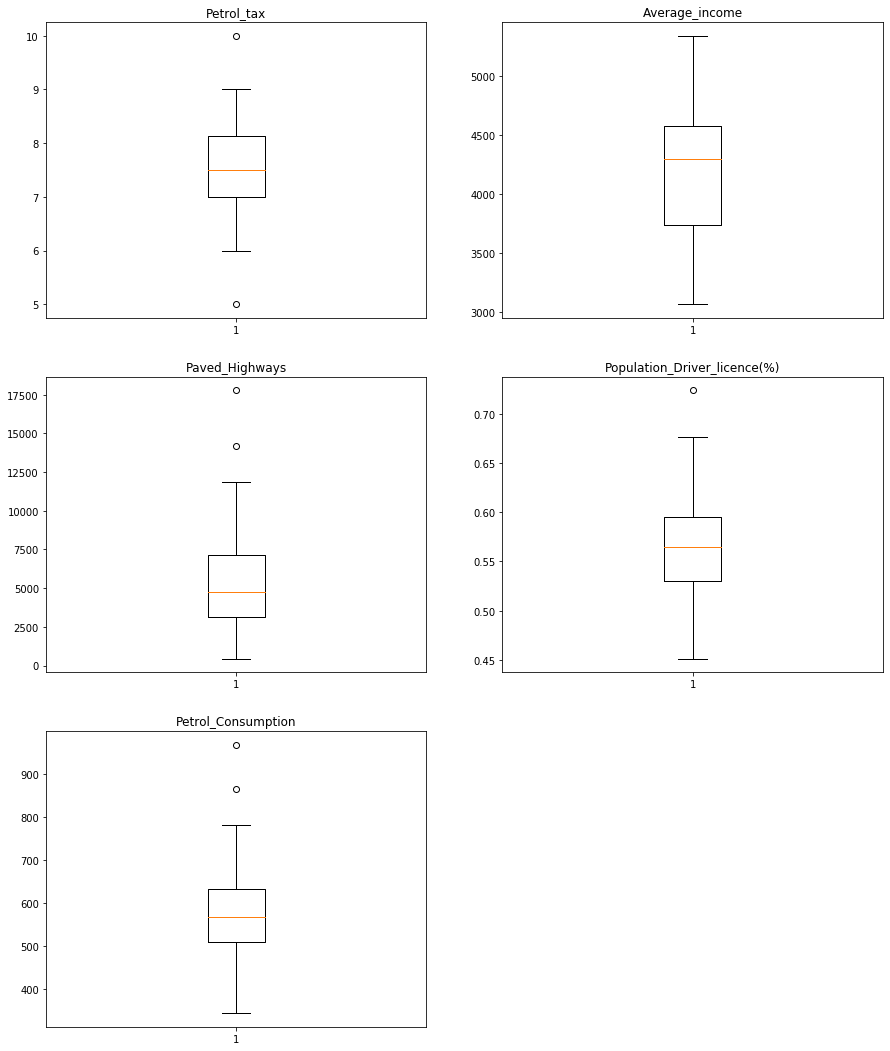

In [7]:
# checking for outliers in numerical columns
plt.figure(figsize = (15,25))   #figsize -- allows us to specify the width and height of a figure in unit inches
count = 1
for col in df.columns:
    if(df[col].dtype != 'O'):
        plt.subplot(4,2,count) #subplot(nrows,ncolumns)
        plt.boxplot(df[col])   #gives us information about min value
        plt.title(col)
        count +=1
              
plt.show()

In [8]:
#checking for correlation
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [9]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [10]:
#split X and y   
X = df.iloc[:,:4].values
y = df.iloc[:,4].values  #iloc[rowindex,columnindex]

In [11]:
y

array([541, 524, 561, 414, 410, 457, 344, 467, 464, 498, 580, 471, 525,
       508, 566, 635, 603, 714, 865, 640, 649, 540, 464, 547, 460, 566,
       577, 631, 574, 534, 571, 554, 577, 628, 487, 644, 640, 704, 648,
       968, 587, 699, 632, 591, 782, 510, 610, 524], dtype=int64)

In [12]:
X.shape

(48, 4)

In [13]:
y.shape

(48,)

In [14]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression    #creating linear regression model
model = LinearRegression()


In [16]:
model.fit(X_train,y_train)    #fitting the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Predictions
y_pred = model.predict(X_test)

In [18]:
#checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.20361932410121653

In [19]:
df2=pd.read_csv('Carseats.csv')

In [20]:
df2.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
df2.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [22]:
df2.isnull().sum()

Unnamed: 0     0
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [23]:
df2.shape

(400, 12)

In [24]:
#dropping Unnamed:0 column
df2.drop('Unnamed: 0',axis = 1,inplace = True)

In [25]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
df2.shape

(400, 11)

In [27]:
df2.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [28]:
df2['US'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df2.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [30]:
#cheking the unique values in each categorical columns
for col in df2.columns:
    if(df2[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,df2[col].unique()))

Unique values in ShelveLoc = ['Bad' 'Good' 'Medium']
Unique values in Urban = ['Yes' 'No']
Unique values in US = ['Yes' 'No']


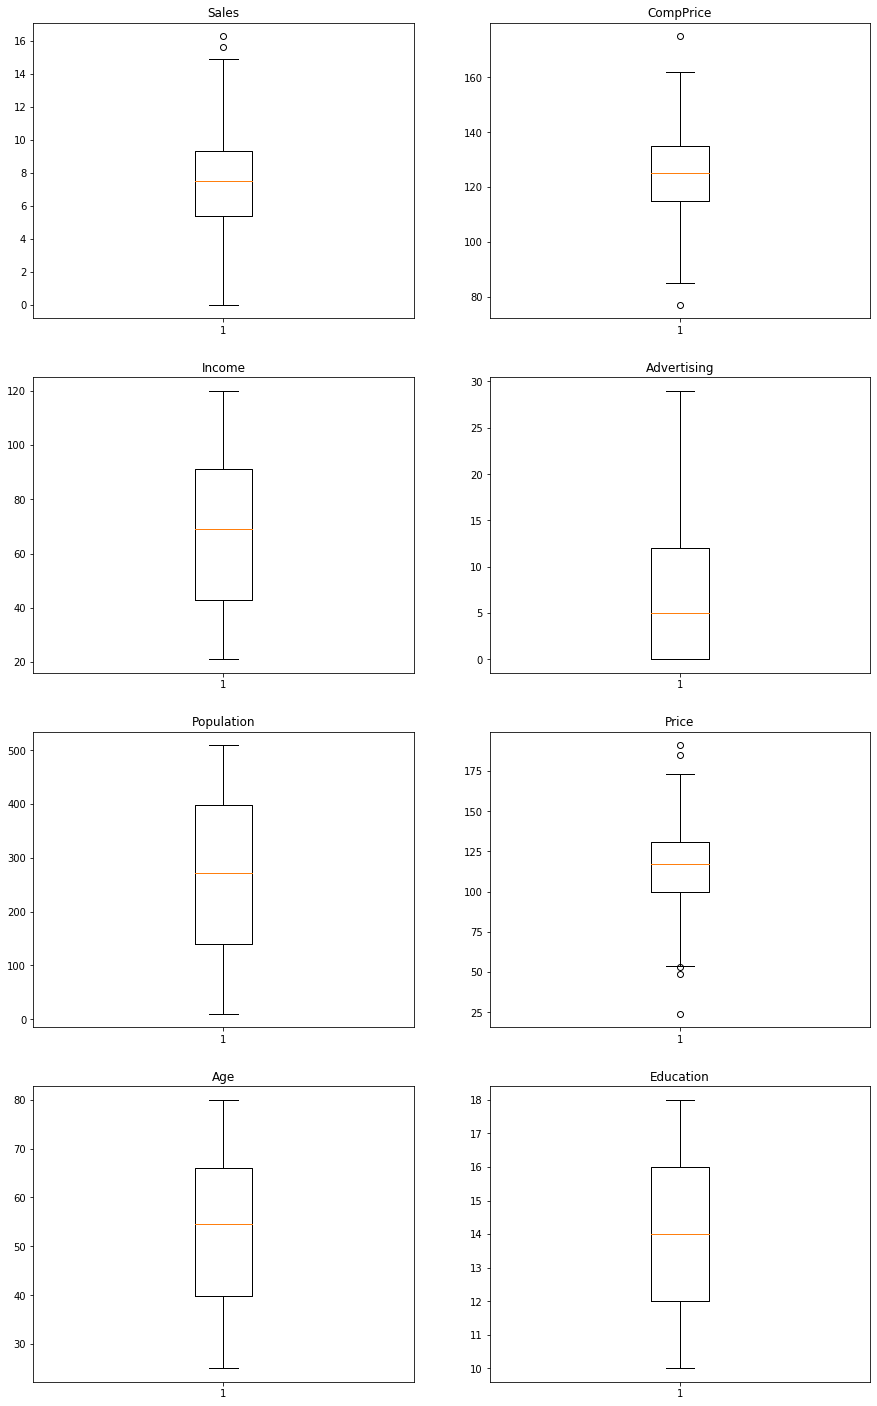

In [31]:
# checking for outliers in numerical columns
plt.figure(figsize = (15,25))   #figsize -- allows us to specify the width and height of a figure in unit inches
count = 1
for col in df2.columns:
    if(df2[col].dtype != 'O'):
        plt.subplot(4,2,count) #subplot(nrows,ncolumns)
        plt.boxplot(df2[col])   #gives us information about min value
        plt.title(col)
        count +=1
              
plt.show()

In [32]:
#checking for correlation
df2.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [33]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [34]:
#applying label encoding on Shelveloc column
my_dict = {
    'Bad':0,
    'Medium':1,
    'Good':2
}

In [35]:
df2['ShelveLoc_new'] = df2['ShelveLoc'].map(my_dict)

In [36]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_new
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [37]:
#droping old ShelveLoc column
df2.drop('ShelveLoc',axis = 1,inplace = True)

In [38]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_new
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,38,13,Yes,No,0


In [39]:
pd.get_dummies(df2,drop_first=True) #method to convert categorical variable to numerical variables

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,2,1,1
2,10.06,113,35,10,269,80,59,12,1,1,1
3,7.40,117,100,4,466,97,55,14,1,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,2,1,1
396,6.14,139,23,3,37,120,55,11,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,1
398,5.94,100,79,7,284,95,50,12,0,1,1


In [40]:
#one hot encoding the other two columns and droping the first two rows
df3 = pd.get_dummies(df2,drop_first=True)

In [41]:
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,2,1,1
2,10.06,113,35,10,269,80,59,12,1,1,1
3,7.40,117,100,4,466,97,55,14,1,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


In [42]:
#split X and y
X1 = df3.iloc[:,1:].values
y1 = df3.iloc[:,0].values

In [43]:
X

array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
       [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
       [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
       [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
       [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
       [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
       [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
       [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
       [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
       [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
       [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
       [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
       [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
       [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
       [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
       [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
       [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
       [7.0000e+00, 3.7180e+03,

In [44]:
y1

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [45]:
X1.shape

(400, 10)

In [46]:
y1.shape

(400,)

In [47]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2,random_state = 0)

In [48]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:

#fitting the training data
model.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#Predictions
y_pred1 = model.predict(X_test1)

In [51]:
#checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.800191679108424